In [14]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import matplotlib.pyplot as plt
import sys
import pdb
import glob
import pickle
import dill as pickle_dill
import kabuki
import os
import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm

cwd = os.getcwd()

print(cwd)
data_dir = cwd+"/Data/Y_maze/data_with_animal_ids/"
data_target_dir1 = cwd+"/Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/"
data_target_dir2 = cwd+"/Data/processed_data/Y_maze/data_with_animal_ids/for_ddm_models/"
figure_dir = cwd+"/Figures/SIAM/"

plt.rcParams["figure.facecolor"] = "w"
postfix = "_binomwise_"

/home/jyotika/2-arm-bandit-task


In [2]:
best_model_name = 'a_cpp_v_B_conditionwise'
av_fits_hddm = pd.read_csv(data_target_dir2+"block_change_aligned_df.csv")

posterior = pd.DataFrame()

for grp in av_fits_hddm.groupby(["animal_id"]):
    sub = grp[0]
    nuclei = np.unique([x.split('-')[0] for x in grp[1]["condition"]])[0]
    
    if os.path.exists(data_target_dir2+best_model_name+str(sub)) == True:
        model = pickle.load(open(data_target_dir2+best_model_name+str(sub),"rb"))
        temp = pd.DataFrame()
        for cond in ["Control","Stim"]:
            temp1 = pd.DataFrame()
            temp1["v ~ "+r'$\Delta$'+"B"] = model['v_ideal_B:C(condition)'+"["+nuclei+"-"+cond+"]"][0]
            temp1["a ~ "+r'$\Omega$'] = model['a_cpp:C(condition)'+"["+nuclei+"-"+cond+"]"][0]
            temp1["condition"] = nuclei+"-"+cond
            temp = temp.append(temp1)
        temp["animal_id"] = grp[0]
        posterior = posterior.append(temp)
posterior = posterior.reset_index()            

In [3]:
posterior

,index,v ~ $\Delta$B,a ~ $\Omega$,condition,animal_id
0,0,0.590168,-0.389336,iSPN-Control,1.0
1,1,0.587834,-0.383780,iSPN-Control,1.0
2,2,0.565681,-0.394423,iSPN-Control,1.0
3,3,0.568569,-0.378378,iSPN-Control,1.0
4,4,0.576231,-0.393011,iSPN-Control,1.0
...,...,...,...,...,...
357181,20641,-0.450230,66.047175,dSPN-Stim,10.0
357182,20642,-0.493403,65.756219,dSPN-Stim,10.0
357183,20643,-0.427735,65.174772,dSPN-Stim,10.0
357184,20644,-0.362878,69.472753,dSPN-Stim,10.0


<Figure size 432x288 with 0 Axes>

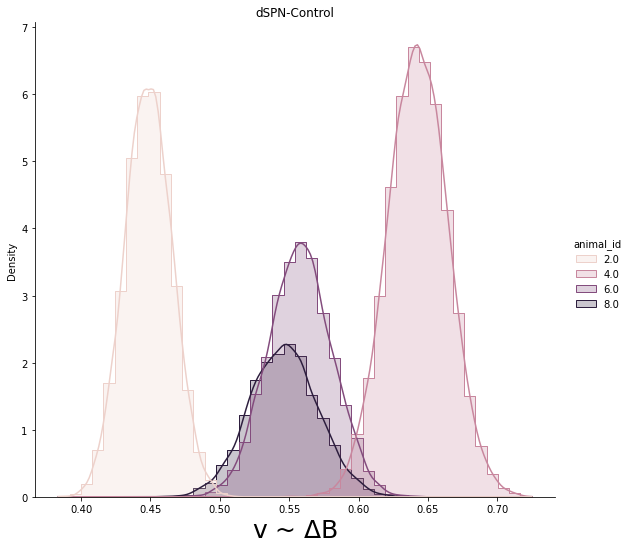

<Figure size 432x288 with 0 Axes>

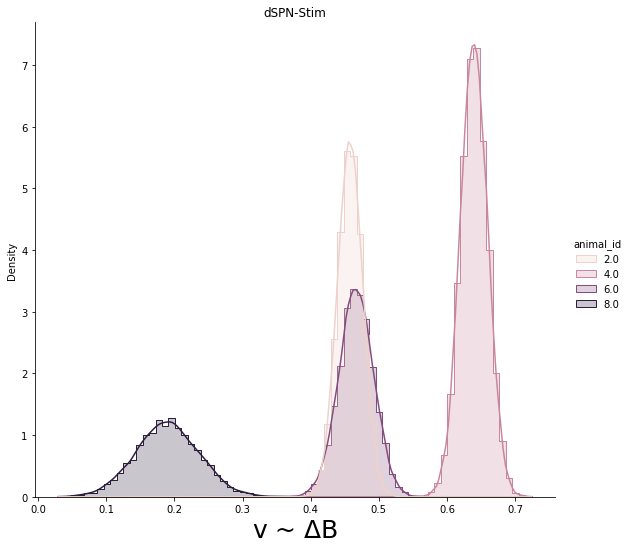

<Figure size 432x288 with 0 Axes>

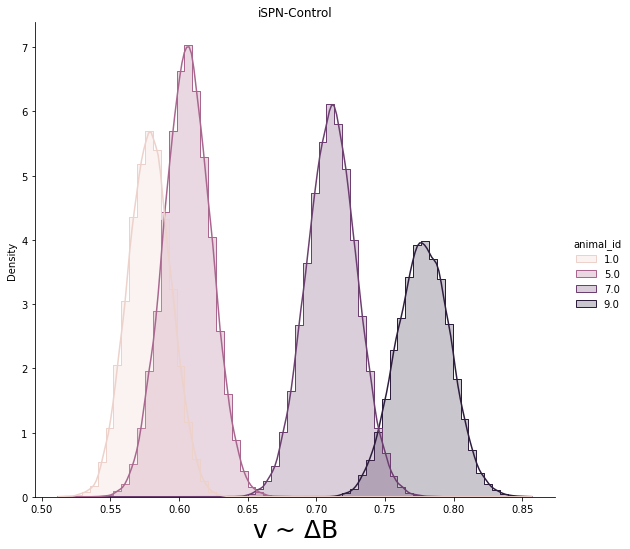

<Figure size 432x288 with 0 Axes>

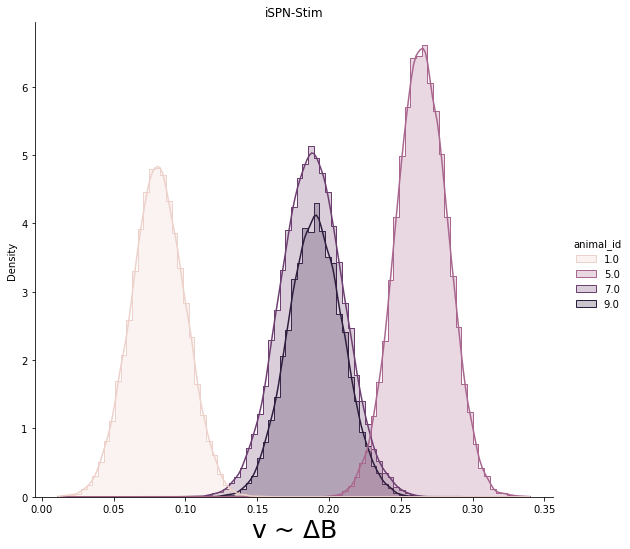

In [17]:
wo_10 = posterior.loc[posterior["animal_id"]!=10.0]
for grp in wo_10.groupby(["condition"]):
    pl.figure()
    g1 = sns.displot(x="v ~ "+r'$\Delta$'+"B",hue="animal_id",data=grp[1],kde=True,element='step',height=8,stat='density')
    for ax in g1.axes[0]:
        ax.set_xlabel(ax.get_xlabel(),fontsize=25)
        ax.set_title(grp[0])
    g1.fig.subplots_adjust(top=0.9)
    g1.fig.savefig(figure_dir+"v_vs_B_coefficients_"+grp[0]+".png")

<Figure size 432x288 with 0 Axes>

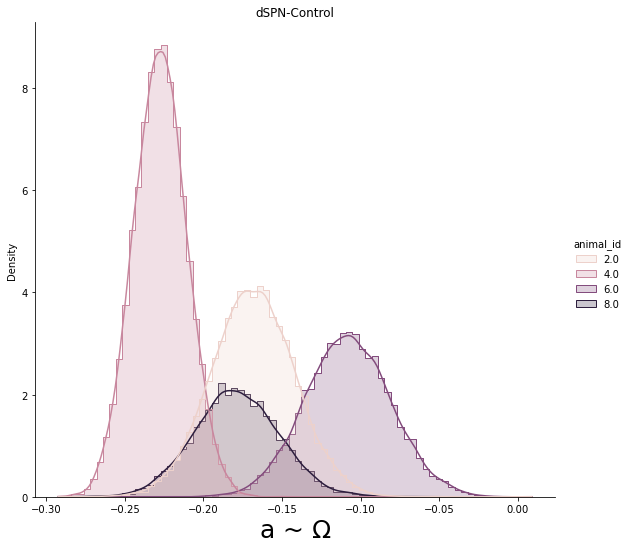

<Figure size 432x288 with 0 Axes>

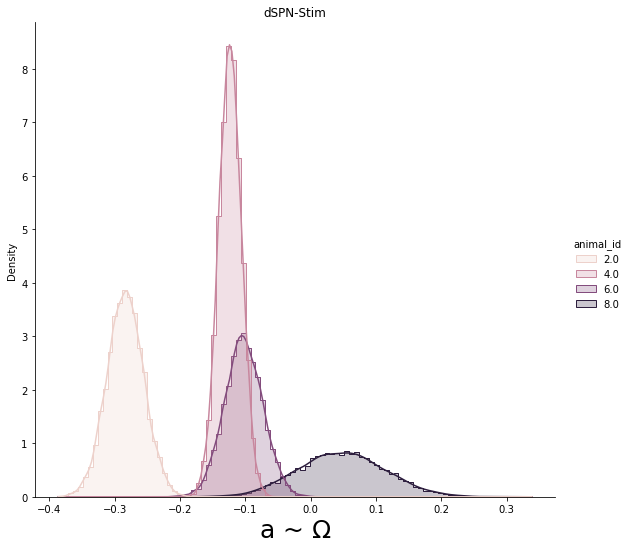

<Figure size 432x288 with 0 Axes>

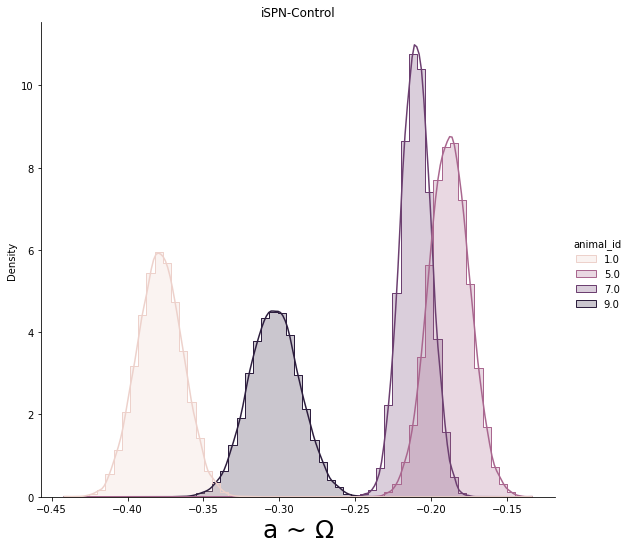

<Figure size 432x288 with 0 Axes>

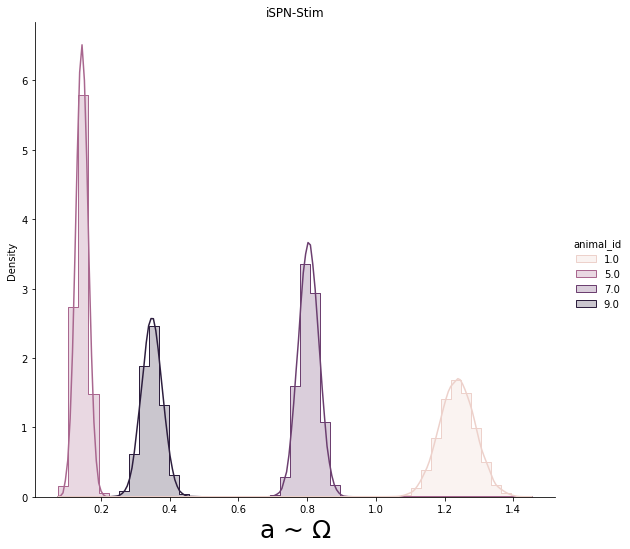

In [18]:
for grp in wo_10.groupby(["condition"]):
    pl.figure()
    g1 = sns.displot(x="a ~ "+r'$\Omega$',hue="animal_id",data=grp[1],kde=True,element='step',height=8,stat='density')
    for ax in g1.axes[0]:
        ax.set_xlabel(ax.get_xlabel(),fontsize=25)
        ax.set_title(grp[0])
    g1.fig.subplots_adjust(top=0.9)
    g1.fig.savefig(figure_dir+"a_vs_CPP_coefficients_"+grp[0]+".png")


In [13]:
model['v_ideal_B:C(condition)[dSPN-Control]'][0]

array([0.92781982, 0.93428526, 0.94714936, ..., 0.93738348, 0.91489894,
       0.92944625])

In [20]:
grp[1].columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'r_t0', 'r_t1', 'cp',
       'epoch_number', 'reward_p_t0', 'session', 'conflict', 'volatility',
       'condition', 'p_id_solution', 'action_history', 'chosen_action',
       'trial_num', 'animal_id', 'optimal', 'rt', 'block_num', 'cpp',
       'ideal_B', 'b_t0', 'b_t1', 'MC', 'learning_rate', 'H(hazard_rate)',
       'sigma_estimated', 'u_val', 'n_val', 'block_change',
       'trials_from_change_point', 'block_change_type', 'block_num_change'],
      dtype='object')

In [31]:

param_dict = dict()
param_dict["v"] = 0.24
param_dict["a"] = 0.1
param_dict["t"] = 0.04
param_dict["sv"] = 0.1
param_dict["sa"] = 0.1

samples = hddm.generate.gen_rts( size=100, dt=0.1, **param_dict)

In [32]:
samples

,rt,response
0,0.14,1.0
1,0.14,0.0
2,0.14,1.0
3,0.14,1.0
4,0.14,1.0
...,...,...
95,0.14,1.0
96,0.14,1.0
97,0.14,1.0
98,0.14,1.0


In [38]:
hddm.generate.gen_rts(**param_dict)

,rt,response
0,0.042,0.0
1,0.042,0.0
2,0.047,1.0
3,0.042,1.0
4,0.041,0.0
...,...,...
995,0.045,0.0
996,0.041,0.0
997,0.041,0.0
998,0.041,1.0
